<a href="https://colab.research.google.com/github/stephaniesanjines/ds10finalproject/blob/main/Bitcoin_Model_Gold_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a linear regression model for bitcoin price based on Nasdaq and Gold index closing and opening prices.

In [ ]:
#import the data
from google.colab import files
uploaded = files.upload()

Saving BTC-Clean.csv to BTC-Clean.csv
Saving GOLD-Clean.csv to GOLD-Clean.csv
Saving NASDAQ-Clean.csv to NASDAQ-Clean.csv


In [ ]:
import pandas as pd

# User pandas read_csv to load the data into two dataframes
bitcoin = pd.read_csv('BTC-Clean.csv')
nasdaq = pd.read_csv('NASDAQ-Clean.csv')
gold = pd.read_csv('GOLD-Clean.csv')

In [ ]:
len(bitcoin),len(nasdaq),len(gold)

(501, 501, 501)

In [ ]:
# checking for null values (should be none as data was manually cleaned)
nasdaq.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# checking for null values (should be none as data was manually cleaned)
bitcoin.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# checking for null values (should be none as data was manually cleaned)
gold.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
1,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
3,2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637
4,2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305


In [ ]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2607290000
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2579550000
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2507550000
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2380290000


In [ ]:
gold.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,160.380005,162.820007,158.820007,160.710007,160.710007,0
1,2019-01-03,162.539993,163.880005,160.830002,163.369995,163.369995,0
2,2019-01-04,161.429993,162.949997,158.929993,162.320007,162.320007,0
3,2019-01-07,163.449997,163.820007,159.649994,160.110001,160.110001,0
4,2019-01-08,158.419998,160.600006,157.330002,160.179993,160.179993,0


In [ ]:
bitcoin.shape, nasdaq.shape, gold.shape

((501, 7), (501, 7), (501, 7))

In [ ]:
# bitcoin
bitcoin_open = bitcoin['Open']
bitcoin_close = bitcoin['Adj Close']
bitcoin_date = bitcoin['Date']

#nasdaq
nasdaq_open = nasdaq['Open']
nasdaq_close = nasdaq['Adj Close']
nasdaq_date = nasdaq['Date']

#gold
gold_open = gold['Open']
gold_close = gold['Adj Close']
gold_date = gold['Date']

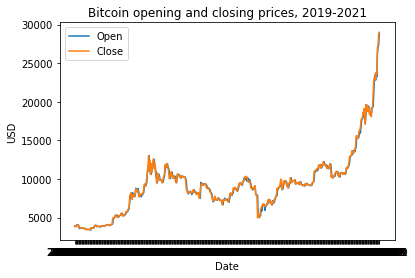

In [ ]:
import matplotlib.pyplot as plt
# plotting bitcoin opening and closing data together
plt.plot(bitcoin_date, bitcoin_open, label = 'Open')
plt.plot(bitcoin_date, bitcoin_close, label = 'Close')

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Bitcoin opening and closing prices, 2019-2021')
plt.legend();

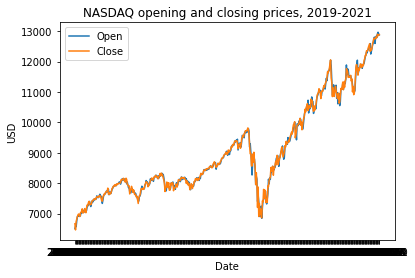

In [ ]:
# plotting nasdaq opening and closing data together
plt.plot(nasdaq_date, nasdaq_open, label = 'Open')
plt.plot(nasdaq_date, nasdaq_close, label = 'Close');

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('NASDAQ opening and closing prices, 2019-2021')
plt.legend();

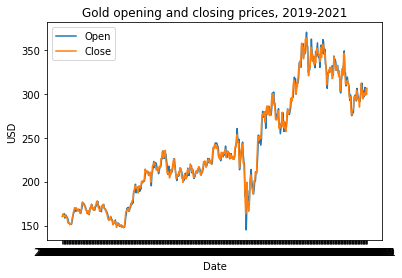

In [ ]:
# plotting gold opening and closing data together
plt.plot(gold_date, gold_open, label = 'Open')
plt.plot(gold_date, gold_close, label = 'Close');

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Gold opening and closing prices, 2019-2021')
plt.legend();

The following plots show Bitcoin and NASDAQ opening prices plotted togegether, and the Bitcoin and NASDAQ closing prices plotted together, but they aren't very useful beceause NASDAQ prices are recorded exclusively on business days, but Bitcoin prices are recorded every day. 

In [ ]:
#Concatenating bitcoin, nasdaq, and gold closing data into one dataframe
df_close = pd.concat([bitcoin['Close'],nasdaq['Close'],gold['Close']], axis=1)
df_close.columns = ['BitcoinClose', 'NASDAQClose', 'GoldClose']

In [ ]:
df_close.shape

(501, 3)

In [ ]:
#Concatenating bitcoin, nasdaq, and gold opening data into one dataframe
df_open = pd.concat([bitcoin['Open'],nasdaq['Open'],gold['Open']], axis=1)
df_open.columns = ['BitcoinOpen', 'NASDAQOpen', 'GoldOpen']

In [ ]:
df_open.shape

(501, 3)

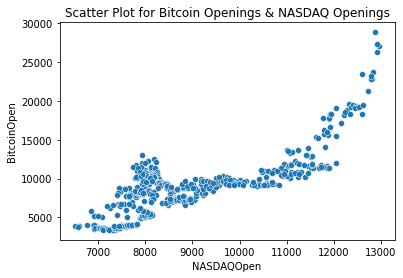

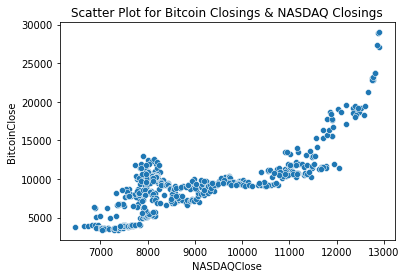

In [ ]:
# scatter plots of bitcoin and nasdaq opening data & bitcoin and nasdaq closing data
import seaborn as sns

sns.scatterplot(data = df_open, x='NASDAQOpen', y='BitcoinOpen')
plt.title('Scatter Plot for Bitcoin Openings & NASDAQ Openings')
plt.show()

#Scatter plot of bitcoin closing and nasdaq closing
sns.scatterplot(data = df_close, x='NASDAQClose', y='BitcoinClose')
plt.title('Scatter Plot for Bitcoin Closings & NASDAQ Closings')
plt.show()

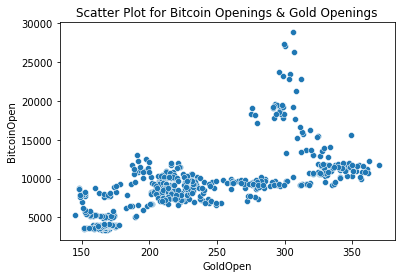

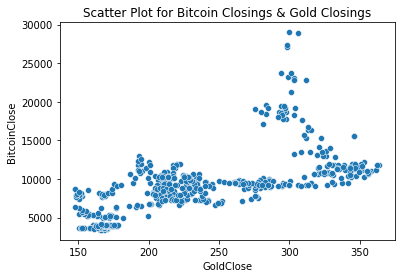

In [ ]:
# scatter plots of bitcoin and gold opening data & bitcoin and gold closing data

sns.scatterplot(data = df_open, x='GoldOpen', y='BitcoinOpen')
plt.title('Scatter Plot for Bitcoin Openings & Gold Openings')
plt.show()

#Scatter plot of bitcoin closing and nasdaq closing
sns.scatterplot(data = df_close, x='GoldClose', y='BitcoinClose')
plt.title('Scatter Plot for Bitcoin Closings & Gold Closings')
plt.show()

In [ ]:
# Building the model using opening data (BTC vs GOLD+NASDAQ)
import statsmodels.api as sm
from statsmodels import graphics
from sklearn.model_selection import train_test_split

data_open = df_open[['NASDAQOpen', 'GoldOpen']]

X_lr_open = data_open
y_lr_open = df_open['BitcoinOpen']

# Create new training and test sets
X_train_lr_open, X_test_lr_open, y_train_lr_open, y_test_lr_open = train_test_split(X_lr_open, y_lr_open, test_size=0.2, random_state=0)

# Creating the linear regression model (for one feature)
lr_open_model = sm.OLS(y_train_lr_open, sm.add_constant(X_train_lr_open))

# Fitting the model to the data (i.e., training the model)
lr_open_results = lr_open_model.fit()

# Printing summary statistics of the model
print(lr_open_results.summary())

# Predictions on the test set
lr_open_preds = lr_open_results.predict(sm.add_constant(X_test_lr_open))


                            OLS Regression Results                            
Dep. Variable:            BitcoinOpen   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     428.4
Date:                Tue, 04 May 2021   Prob (F-statistic):          7.28e-100
Time:                        18:42:33   Log-Likelihood:                -3669.4
No. Observations:                 400   AIC:                             7345.
Df Residuals:                     397   BIC:                             7357.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.16e+04    738.835    -15.704      0.0

In [ ]:
#testing opening
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

regressor.fit(X_train_lr_open,y_train_lr_open)

predictedopen = regressor.predict(X_test_lr_open)

openframe = pd.DataFrame(y_test_lr_open, predictedopen)

openfr = pd.DataFrame({'Actual':y_test_lr_open,'Predicted':predictedopen,'Deviations': (predictedopen - y_test_lr_open), 'Residuals': (predictedopen - y_test_lr_open)**2})
openfr

,Actual,Predicted,Deviations,Residuals
90,6971.178223,7430.951187,459.772964,2.113912e+05
254,7410.452148,8774.524621,1364.072473,1.860694e+06
284,10143.798828,11375.644682,1231.845854,1.517444e+06
446,11429.047852,15025.187016,3596.139164,1.293222e+07
339,9936.162109,8089.198937,-1846.963172,3.411273e+06
...,...,...,...,...
56,4024.112793,6556.434778,2532.321985,6.412655e+06
441,10624.390625,13040.494807,2416.104182,5.837559e+06
60,4068.299805,6915.170785,2846.870980,8.104674e+06
208,9248.440430,7801.828316,-1446.612114,2.092687e+06


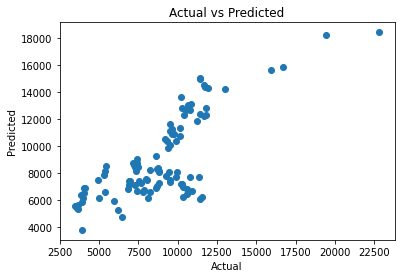

In [ ]:
# Plot of predictions for open
# plt.plot(y_test_lr_open, predictedopen)
plt.scatter(y_test_lr_open, predictedopen)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Building the model using closing data (BTC vs GOLD+NASDAQ)

# normalizing the range of nasdaq & gold
data_close = df_close[['NASDAQClose', 'GoldClose']]

X_lr_close = data_close
y_lr_close = df_close['BitcoinClose']

# Create new training and test sets
X_train_lr_close, X_test_lr_close, y_train_lr_close, y_test_lr_close = train_test_split(X_lr_close, y_lr_close, test_size=0.2, random_state=0)

# Creating the linear regression model
lr_close_model = sm.OLS(y_train_lr_close, sm.add_constant(X_train_lr_close))

# Fitting the model to the data (i.e., training the model)
lr_close_results = lr_close_model.fit()

# Printing summary statistics of the model
print(lr_close_results.summary())

# Predictions on the test set
lr_close_preds = lr_close_results.predict(sm.add_constant(X_test_lr_close))

                            OLS Regression Results                            
Dep. Variable:           BitcoinClose   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     417.5
Date:                Tue, 04 May 2021   Prob (F-statistic):           2.40e-98
Time:                        18:42:37   Log-Likelihood:                -3678.2
No. Observations:                 400   AIC:                             7362.
Df Residuals:                     397   BIC:                             7374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.171e+04    751.516    -15.578      

In [ ]:
regressor.fit(X_train_lr_close,y_train_lr_close)

predictedclose = regressor.predict(X_test_lr_close)

closeframe = pd.DataFrame(y_test_lr_close, predictedclose)

closefr = pd.DataFrame({'Actual':y_test_lr_close,'Predicted':predictedclose,'Deviations': (predictedclose - y_test_lr_close), 'Residuals': (predictedclose - y_test_lr_close)**2})
closefr.head(10)

,Actual,Predicted,Deviations,Residuals
90,7814.915039,7145.276754,-669.638285,4.484154e+05
254,7769.219238,9306.975067,1537.755829,2.364693e+06
284,9633.386719,11438.018125,1804.631406,3.256695e+06
446,11429.506836,14727.786306,3298.279470,1.087865e+07
339,9842.666016,8313.844414,-1528.821602,2.337295e+06
15,3600.865479,5460.288979,1859.423500,3.457456e+06
407,11768.871094,12823.172568,1054.301474,1.111552e+06
278,9856.611328,11147.495652,1290.884324,1.666382e+06
159,10763.232422,6486.426309,-4276.806113,1.829107e+07
153,11382.616211,6248.139188,-5134.477023,2.636285e+07


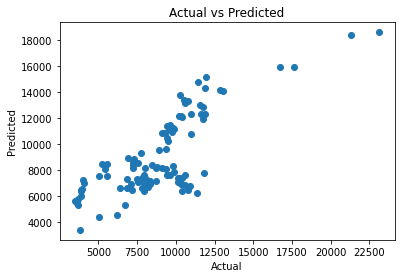

In [ ]:
# Plot of predictions for close
plt.scatter(y_test_lr_close, predictedclose)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           BitcoinClose   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     743.2
Date:                Tue, 04 May 2021   Prob (F-statistic):           4.51e-93
Time:                        18:42:52   Log-Likelihood:                -3694.0
No. Observations:                 400   AIC:                             7392.
Df Residuals:                     398   BIC:                             7400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.011e+04    724.817    -13.949      

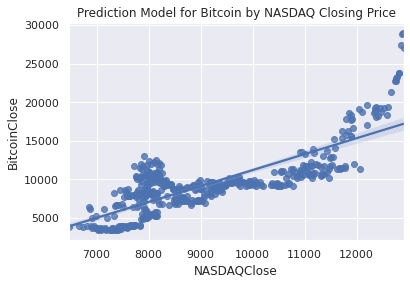

In [ ]:
#SIMPLE NASDAQ Close
X_lr_nclose = df_close['NASDAQClose']
y_lr_nclose = df_close['BitcoinClose']

# Create new training and test sets
X_train_lr_nclose, X_test_lr_nclose, y_train_lr_nclose, y_test_lr_nclose = train_test_split(X_lr_nclose, y_lr_nclose, test_size=0.2, random_state=0)

# Creating the linear regression model
lr_nclose_model = sm.OLS(y_train_lr_nclose, sm.add_constant(X_train_lr_nclose))

# Fitting the model to the data (i.e., training the model)
lr_nclose_results = lr_nclose_model.fit()

# Printing summary statistics of the model
print(lr_nclose_results.summary())

# Predictions on the test set
lr_nclose_preds = lr_nclose_results.predict(sm.add_constant(X_test_lr_nclose))

sns.set_theme(style="darkgrid")
sns.regplot(x=df_close['NASDAQClose'],y=df_close['BitcoinClose'])
plt.title('Prediction Model for Bitcoin by NASDAQ Closing Price')
plt.show()

In [ ]:
#SIMPLE NASDAQ Open
X_lr_nopen = df_open['NASDAQOpen']
y_lr_nopen = df_open['BitcoinOpen']

# Create new training and test sets
X_train_lr_nopen, X_test_lr_nopen, y_train_lr_nopen, y_test_lr_nopen = train_test_split(X_lr_nopen, y_lr_nopen, test_size=0.2, random_state=0)

# Creating the linear regression model (for one feature)
lr_nopen_model = sm.OLS(y_train_lr_nopen, sm.add_constant(X_train_lr_nopen))

# Fitting the model to the data (i.e., training the model)
lr_nopen_results = lr_nopen_model.fit()

# Printing summary statistics of the model
print(lr_nopen_results.summary())

# Predictions on the test set
lr_nopen_preds = lr_nopen_results.predict(sm.add_constant(X_test_lr_nopen))

sns.set_theme(style="darkgrid")
sns.regplot(x=df_open['NASDAQOpen'],y=df_open['BitcoinOpen'])
plt.title('Prediction Model for Bitcoin by NASDAQ Opening Price')
plt.show()

In [ ]:
#SIMPLE GOLD Open

X_lr_gopen = df_open['GoldOpen']
y_lr_gopen = df_open['BitcoinOpen']

# Create new training and test sets
X_train_lr_gopen, X_test_lr_gopen, y_train_lr_gopen, y_test_lr_gopen = train_test_split(X_lr_gopen, y_lr_gopen, test_size=0.2, random_state=0)

# Creating the linear regression model (for one feature)
lr_gopen_model = sm.OLS(y_train_lr_gopen, sm.add_constant(X_train_lr_gopen))

# Fitting the model to the data (i.e., training the model)
lr_gopen_results = lr_gopen_model.fit()

# Printing summary statistics of the model
print(lr_gopen_results.summary())

# Predictions on the test set
lr_gopen_preds = lr_gopen_results.predict(sm.add_constant(X_test_lr_gopen))

sns.set_theme(style="darkgrid")
sns.regplot(x=df_open['GoldOpen'],y=df_open['BitcoinOpen'])
plt.title('Prediction Model for Bitcoin by Gold Opening Price')
plt.show()

In [ ]:
#SIMPLE GOLD Close

X_lr_gclose = df_close['GoldClose']
y_lr_gclose = df_close['BitcoinClose']

# Create new training and test sets
X_train_lr_gclose, X_test_lr_gclose, y_train_lr_gclose, y_test_lr_gclose = train_test_split(X_lr_gclose, y_lr_gclose, test_size=0.2, random_state=0)

# Creating the linear regression model
lr_gclose_model = sm.OLS(y_train_lr_gclose, sm.add_constant(X_train_lr_gclose))

# Fitting the model to the data (i.e., training the model)
lr_gclose_results = lr_gclose_model.fit()

# Printing summary statistics of the model
print(lr_gclose_results.summary())

# Predictions on the test set
lr_gclose_preds = lr_gclose_results.predict(sm.add_constant(X_test_lr_gclose))

sns.set_theme(style="darkgrid")
sns.regplot(x=df_close['GoldClose'],y=df_close['BitcoinClose'])
plt.title('Prediction Model for Bitcoin by Gold Closing Price')
plt.show()